# Introdução

### Análise do dataset do Titanic:

Este relatório pretende analisar os dados do Titanic, fazendo algumas perguntas que podem desvendar curiosidades dos leitores, porém tem como objetivo principal ver quais dados foram determinantes para a sobrevivência dos tripulantes.

### As perguntas são:

1 - Qual a quantidade de homens e mulheres no Titanic?

2 - Qual a media de idade dos homens e das mulheres?

3 - Qual a classe de passageiros tem mais integrantes?

4 - Qual é o preço do ticket mais caro e do mais barato?


### Analisando o quesito sobrevivência:

5 - Quais os fatores que mais fizeram as pessoas sobreviverem?

5.1 - A classe influenciou na sobrevivência?

5.2 - O local onde embarcaram pode ter influenciado na sobrevivência?

5.3 - A idade dos passageiros influenciou na sobrevivência deles?

5.4 - para finalizar, o sexo influenciou na sobrevivência dos tripulantes?


### Analisando o preço de passagem

6 - O preço de passagem aumenta de acordo com a idade?


In [48]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

# Lendo arquivo de dados do Titanic
df = pd.read_csv('titanic-data-6.csv')

# Testando se a importação ocorreu bem
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Limpeza de dados:

Como vou utilizar a idade na minha análise, vou substituir os valores nulos pela média de idade total

O mesmo irá acontecer com o Fare, vou retirar as tarifas gratuitas considerando que foi um erro de cadastramento / falta de dados

In [49]:
# Funções de ajuste de dados

# Função que ajusta colunas que contenham dados nulos, com a media dos valores da coluna escolhida
def ajusteColunaComMedia(df, column):
    # Calculando a media da coluna escolhida no segundo arg, e arredondano para baixo com floor
    mediaColumn = math.floor(df[column].mean())
    
    # Substituindo as celulas nulas da coluna
    df[column] = df[column].fillna(mediaColumn)
    
#Função que ajusta colunas que contenham valores zerados, com a media dos valores da coluna escolhida
def ajusteColunaDeValoresZerados(df, column):
    
    # Calculando a media da coluna escolhida no segundo arg, e arredondano para baixo com floor
    mediaColumn = math.floor(df[column].mean())
    
    # Substituindo as celulas zeradas, pela media calculada
    df[column] = df[column].replace(0, mediaColumn)


In [50]:
# Verificando Nan na coluna Age
dfIsNull = df.isnull().sum()

print('Há %d dados faltantes na coluna de idade.' % dfIsNull.Age)

Há 177 dados faltantes na coluna de idade.


In [51]:
# utilizando a função ajusteColunaComMedia para substituir os valores de idade faltante, pela média
ajusteColunaComMedia(df, 'Age')


dfIsNull = df.isnull().sum()

print('Agora há %d dados faltantes na coluna de idade.' % dfIsNull.Age)

Agora há 0 dados faltantes na coluna de idade.


In [52]:
# Calculando a media de Fare (taxas), e arredondano para baixo com floor
mediaFare = math.floor(df['Fare'].mean())

print('A média de Fare é de %d dólares (supondo que foi cobrado em dólar)' % mediaFare)

A média de Fare é de 32 dólares (supondo que foi cobrado em dólar)


In [53]:
# Verificando valores zerados na coluna Fare
dfIsZero = (df['Fare'] == 0).sum()

print('Há %d passagens com valor zerado' % dfIsZero)

Há 15 passagens com valor zerado


In [54]:
# Substituindo as celulas de Fare zeradas
ajusteColunaDeValoresZerados(df, 'Fare')

dfIsZero = (df['Fare'] == 0).sum()

print('Agora há %d dados zerados na coluna tarifas.' % dfIsZero)

Agora há 0 dados zerados na coluna tarifas.


## Resumo da limpeza de dados

### Idade:

1 - Primeiramente calculamos a média para saber com o que prenencher as idades faltantes
2 - Verificamos a quantidade de valores faltantes
3 - Preenchemos com o metodo fillna() os dados faltantes na coluna Age

### Taxa:

1 - Novamente calculamos a média de taxa, e arrendodamos para baixo com o método floor() da lib Math
2 - Contagem dos valores zerados
3 - Substituições dos valores zerados pela média

E com isso os dados estão preparados para responder as perguntas que seguem a análise.


### Agora que resolvemos os problemas nos dados, vamos para a análise!

Vamos analisar os dados do Titanic com algumas perguntas

## 1 - Qual a quantidade de homens e mulheres no Titanic?

In [55]:
male = (df['Sex'] == 'male').sum()

female = (df['Sex'] == 'female').sum()

print("De acordo com estes dados o titanic tinha %d pessoas do sexo masculino e %d do sexo feminino." % (male, female))

De acordo com estes dados o titanic tinha 577 pessoas do sexo masculino e 314 do sexo feminino.


### Segue um gráfico com a representação dos dois sexos

([<matplotlib.patches.Wedge at 0x1a60c063128>,
 [Text(-0.255564,-1.0699,'Homens'), Text(0.255564,1.0699,'Mulheres')],
 [Text(-0.139399,-0.583582,'64.8%'), Text(0.139398,0.583582,'35.2%')])

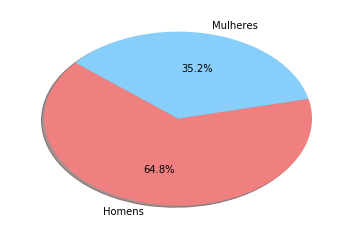

In [56]:
# Data to plot
labels = 'Homens', 'Mulheres'
sizes = [male, female]
colors = ['lightcoral', 'lightskyblue']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

Vemos que há mais homens que mulheres no navio.

## 2 - Qual a media de idade dos homens e das mulheres?

In [57]:
# Formando novos dataframes a partir do sexo
male_df = df.loc[df['Sex'] == 'male']
female_df = df.loc[df['Sex'] == 'female']

# Calulando as medias dos dois grupos
media_male = math.floor(male_df['Age'].sum() / male)
media_female = math.floor(female_df['Age'].sum() / female)

print("A média de idade dos homens no Titanic é de %d anos e das mulheres é de %d anos." % (media_male, media_female))

A média de idade dos homens no Titanic é de 30 anos e das mulheres é de 28 anos.


As mulheres são mais novas que os homens!

Vamos verificar agora a distribuição entre as classes socioeconomicas do Titanic

## 3 - Qual a classe que tem mais ingressantes?

In [58]:
firstClass  = df.loc[df['Pclass'] == 1]
secondClass = df.loc[df['Pclass'] == 2]
thirdClass  = df.loc[df['Pclass'] == 3]

print("A primeira classe tinha %d passageiros, a segunda %d e por fim a terceira %d" % (len(firstClass), len(secondClass), len(thirdClass)))

A primeira classe tinha 216 passageiros, a segunda 184 e por fim a terceira 491


### Representação em gráfico das classes

([<matplotlib.patches.Wedge at 0x1a60c0af3c8>,
 [Text(-1.09779,-0.0697663,'Classe A'),
  Text(-0.106492,-1.09483,'Classe B'),
  Text(0.983974,0.849586,'Classe C')],
 [Text(-0.598792,-0.0380544,'24.2%'),
  Text(-0.0580865,-0.597182,'20.7%'),
  Text(0.605522,0.522822,'55.1%')])

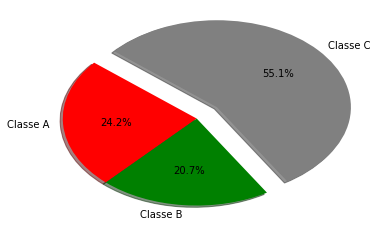

In [59]:
# Data to plot
labels = 'Classe A', 'Classe B', 'Classe C'
sizes = [len(firstClass), len(secondClass), len(thirdClass)]
colors = ['red', 'green', 'gray']
explode = (0, 0, 0.2)
 
# Plot
plt.pie(sizes, explode = explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

A classe mais ecônomica, foi a mais populada

## 4 - Qual é o preço do ticket mais caro e do mais barato?

In [60]:
highestFare = df['Fare'].max()
minimumFare = df['Fare'].min()

print('A tarifa mais cara foi de $%d e a mais barata de $%d dólares' % (highestFare, minimumFare))

A tarifa mais cara foi de $512 e a mais barata de $4 dólares


Vamos analisar agora a questão de sobrevivência, quais foram os fatores que mais fizeram os tripulantes sobreviver

## 5 - Quais os fatores que mais fizeram as pessoas sobreviverem?

### 5.1 - Verificando pela classe:

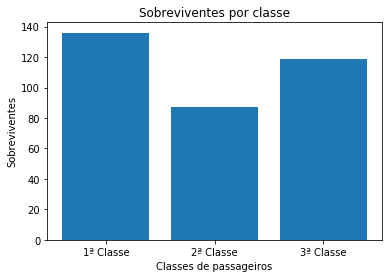

In [61]:

firstClassSurv = df.loc[(df['Pclass'] == 1) & df['Survived'] == 1]
secondClassSurv = df.loc[(df['Pclass'] == 2) & df['Survived'] == 1]
thirdClassSurv = df.loc[(df['Pclass'] == 3) & df['Survived'] == 1]

locations = [1, 2, 3]
heights = [len(firstClassSurv), len(secondClassSurv), len(thirdClassSurv)]
labels = ['1ª Classe', '2ª Classe', '3ª Classe']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes por classe')
plt.xlabel('Classes de passageiros')
plt.ylabel('Sobreviventes');

Podemos verificar que o fato do passageiro ser da primeira classe ajudou na sua sobrevivência, 

Porem a segunda classe não manteve esta lógica, pois a terceira teve mais sobreviventes

Será que isso está correto? Vamos comparar com o total de tripulantes de cada classe

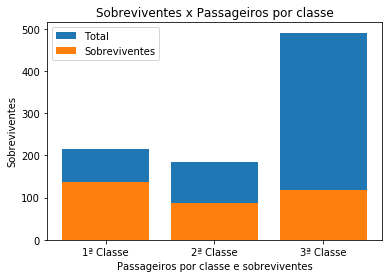

In [62]:
locations = [1, 2, 3]

classes = [len(firstClass), len(secondClass), len(thirdClass)]
plt.bar(locations, classes, tick_label=labels, label='Total')

classes = [len(firstClassSurv), len(secondClassSurv), len(thirdClassSurv)]
labels = ['1ª Classe', '2ª Classe', '3ª Classe']

plt.bar(locations, classes, tick_label=labels, label='Sobreviventes')
plt.title('Sobreviventes x Passageiros por classe')
plt.xlabel('Passageiros por classe e sobreviventes')
plt.ylabel('Sobreviventes')
plt.legend()

([<matplotlib.patches.Wedge at 0x1a60bb73eb8>,
 [Text(-0.937111,-0.57604,'Sobrevientes A'),
  Text(0.942363,-0.567408,'Sobrevientes B'),
  Text(0.240549,1.07338,'Sobrevientes C')],
 [Text(-0.511152,-0.314204,'39.8%'),
  Text(0.514016,-0.309495,'25.4%'),
  Text(0.131209,0.585478,'34.8%')])

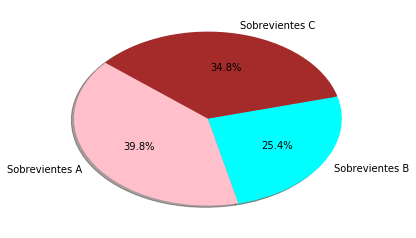

In [77]:
# Data to plot
labels = 'Sobrevientes A', 'Sobrevientes B', 'Sobrevientes C'
sizes = [len(firstClassSurv), len(secondClassSurv), len(thirdClassSurv)]
colors = ['pink', 'cyan', 'brown']
explode = (0,0,0)
 
# Plot
plt.pie(sizes, explode = explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

Temos uma surpresa, na verdade por questões de proporção a segunda classe sobreviveu mais sim que a terceira,

Apenas por sua quantidade maior a terceira tem mais sobreviventes,

Agora podemos afirmar que a classe determinou sim quem sobreviveu!

## 5.2 - O local onde embarcaram pode ter influenciado na sobrevivência?

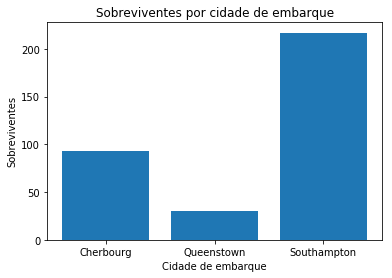

In [63]:
cherbourgSurv = df.loc[(df['Embarked'] == 'C') & df['Survived'] == 1]
queenstownSurv = df.loc[(df['Embarked'] == 'Q') & df['Survived'] == 1]
southamptonSurv = df.loc[(df['Embarked'] == 'S') & df['Survived'] == 1]

locations = [1, 2, 3]
heights = [len(cherbourgSurv), len(queenstownSurv), len(southamptonSurv)]
labels = ['Cherbourg', 'Queenstown', 'Southampton']
plt.bar(locations, heights, tick_label=labels)
plt.title('Sobreviventes por cidade de embarque')
plt.xlabel('Cidade de embarque')
plt.ylabel('Sobreviventes');

Agora diferente dos outros, uma grande disparidade dos sobreviventes foi de Southampton,

Vamos ver se há relação com o número de pessoas que embarcaram nos locais:

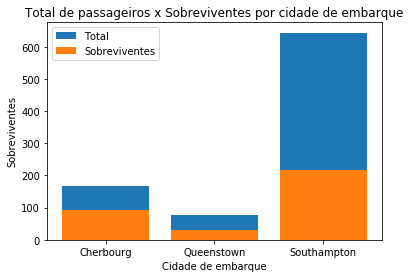

In [64]:
cherbourg = df.loc[(df['Embarked'] == 'C')]
queenstown = df.loc[(df['Embarked'] == 'Q')]
southampton = df.loc[(df['Embarked'] == 'S')]

locations = [1, 2, 3]

classes = [len(cherbourg), len(queenstown), len(southampton)]
plt.bar(locations, classes, tick_label=labels, label='Total')

classes = [len(cherbourgSurv), len(queenstownSurv), len(southamptonSurv)]
labels = ['Cherbourg', 'Queenstown', 'Southampton']

plt.bar(locations, classes, tick_label=labels, label='Sobreviventes')
plt.title('Total de passageiros x Sobreviventes por cidade de embarque')
plt.xlabel('Cidade de embarque')
plt.ylabel('Sobreviventes')
plt.legend()

Podemos ver que sim, a quantidade de embarque em Southampton foi maior!

Vamos verificar a distribuição de classes na região de Southampton: 

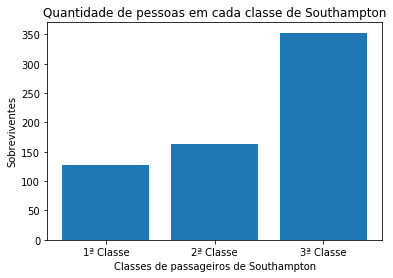

In [65]:
firstClassSouthAmpton = df.loc[(df['Pclass'] == 1) & (df['Embarked'] == 'S')]
secondClassSouthAmpton = df.loc[(df['Pclass'] == 2) & (df['Embarked'] == 'S')]
thirdClassSouthAmpton = df.loc[(df['Pclass'] == 3) & (df['Embarked'] == 'S')]

locations = [1, 2, 3]
heights = [len(firstClassSouthAmpton), len(secondClassSouthAmpton), len(thirdClassSouthAmpton)]
labels = ['1ª Classe', '2ª Classe', '3ª Classe']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de pessoas em cada classe de Southampton')
plt.xlabel('Classes de passageiros de Southampton')
plt.ylabel('Sobreviventes');

Como a classe 3 tem mais população e sobreviveram menos, proporcionalmente, as pessoas que embarcaram em Southampton, temos uma relação de classe x sobrevivência, tambem entre cidades

Só falta verificar a proprorção de sobreviventes entre as classes de Southampton, vamos ver agora:

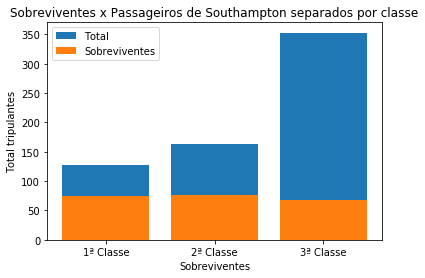

In [66]:
firstClassSouthAmptonSurv = df.loc[(df['Pclass'] == 1) & (df['Embarked'] == 'S') & df['Survived'] == 1]
secondClassSouthAmptonSurv = df.loc[(df['Pclass'] == 2) & (df['Embarked'] == 'S') & df['Survived'] == 1]
thirdClassSouthAmptonSurv = df.loc[(df['Pclass'] == 3) & (df['Embarked'] == 'S') & df['Survived'] == 1]

locations = [1, 2, 3]

heights = [len(firstClassSouthAmpton), len(secondClassSouthAmpton), len(thirdClassSouthAmpton)]
plt.bar(locations, heights, tick_label=labels, label='Total')

classes = [len(firstClassSouthAmptonSurv), len(secondClassSouthAmptonSurv), len(thirdClassSouthAmptonSurv)]
labels = ['1ª Classe', '2ª Classe', '3ª Classe']

plt.bar(locations, classes, tick_label=labels, label='Sobreviventes')
plt.title('Sobreviventes x Passageiros de Southampton separados por classe')
plt.xlabel('Sobreviventes')
plt.ylabel('Total tripulantes')
plt.legend()

Em Southampton é claro para nós que a sobrevivência foi influenciada pela classe

Agora trocando de fator, sabemos que a ordem é salvar primeiro os mais novos, mulheres e idosos, será que a idade influenciou na sobrevivência?

## 5.3  - A idade dos passageiros influenciou na sobrevivência deles?

Primeiro vamos criar grupos de idade, com os seguinte grupos:

Criança = 0 - 14 anos

Jovens e adultos = 15 - 64 anos

Idosos = mais de 65 anos

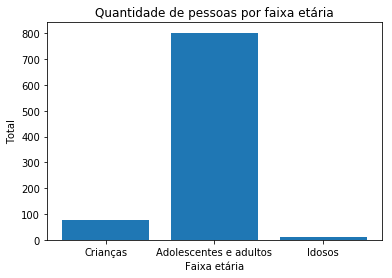

In [67]:
youngTotal     = df.loc[(df['Age'] <= 14)]
middleageTotal = df.loc[(df['Age'] > 14) & (df['Age'] < 65)]
oldTotal       = df.loc[(df['Age'] >= 65)]

locations = [1, 2, 3]
heights = [len(youngTotal), len(middleageTotal), len(oldTotal)]
labels = ['Crianças', 'Adolescentes e adultos', 'Idosos']

plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de pessoas por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Total');

Com os grupos divididos podemos ver que a maioria são adolescentes e adultos,

E agora vamos comparar a questão da sobrevivência:

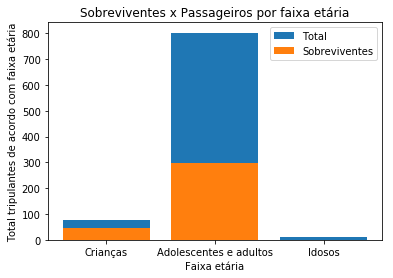

In [68]:
youngTotalSurv     = df.loc[(df['Age'] <= 14) & df['Survived'] == 1]
middleageTotalSurv = df.loc[(df['Age'] > 14) & (df['Age'] < 65) & df['Survived'] == 1]
oldTotalSurv       = df.loc[(df['Age'] >= 65) & df['Survived'] == 1]


locations = [1, 2, 3]

heights = [len(youngTotal), len(middleageTotal), len(oldTotal)]
plt.bar(locations, heights, tick_label=labels, label='Total')

classes = [len(youngTotalSurv), len(middleageTotalSurv), len(oldTotalSurv)]
labels = ['Crianças', 'Adolescentes e adultos', 'Idosos']

plt.bar(locations, classes, tick_label=labels, label='Sobreviventes')
plt.title('Sobreviventes x Passageiros por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Total tripulantes de acordo com faixa etária')
plt.legend()

As crianças sobreviveram mais do que a metade de sua quantidade total, e os idosos apenas 1 de 10 presentes nos dados.

Pelo menos as crianças foram respeitadas a prioridade

## 5.4 - para finalizar, o sexo influenciou na sobrevivência dos tripulantes?

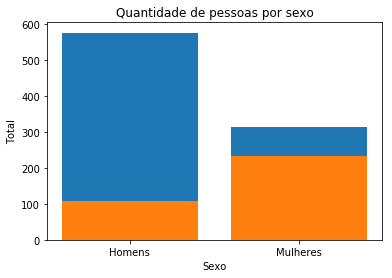

In [69]:
locations = [1, 2]
heights = [len(male_df), len(female_df)]
labels = ['Homens', 'Mulheres']

plt.bar(locations, heights, tick_label=labels, label='Total')

maleSurv = df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1)]
femaleSurv = df.loc[(df['Sex'] == 'female')  & (df['Survived'] == 1)]

classes = [len(maleSurv), len(femaleSurv)]

plt.bar(locations, classes, tick_label=labels, label='Sobreviventes')

plt.title('Quantidade de pessoas por sexo')
plt.xlabel('Sexo')
plt.ylabel('Total');

As mulheres foram priorizadas!

Além de em quantidade foi maior que a dos homens, a proporção tambem foi gritantemente maior!

## 6 - O preço da passagem é influenciado pela idade?

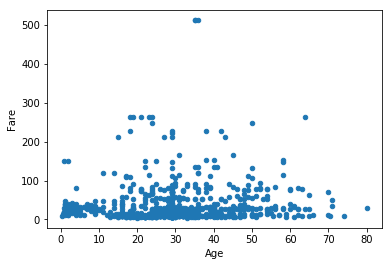

In [71]:
df.plot(kind='scatter', x='Age', y='Fare');

In [73]:
## 7 - O preço da passagem é influenciado pela classe?

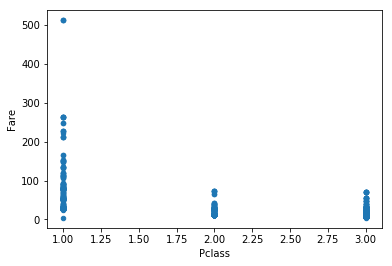

In [74]:
df.plot(kind='scatter', x='Pclass', y='Fare');

## Conclusão:

Observamos primeiramente a maioria dos passageiros ser compostas por mulheres com 64.8% e os ficaram com 35.2%

Depois vimos que a media de idade dos homens é de 30 anos, e a de mulheres 28.

A população das classes foi distribuida da seguinte maneira a primeira classe com 216 (24.2%) passageiros, a segunda 184 (20.7%) e por fim a terceira 491 (55.1%).

Analisamos tambem o preço da maior e da menor tarifa que foram respectivamente de 512 e 4 dólares.

Podemos concluir que o fator sobreviência que observamos, foi altamente influenciado pela classe do passageiro, ou seja, quanto mais alta a classe mais chance dele sobreviver.

- 1ª classe total: 216 - Sobreviventes 39.8%
- 2ª classe total: 184 - Sobreviventes 25.4%
- 3ª classe total: 491 - Sobreviventes 34.8%

A parte boa é que crianças foram priorizadas sim no salvamento, proporcionalmente sobreviveram mais que qualquer outro grupo e também as mulheres, que proporcionalmente e em quantidade sobreviveram mais que os homens.

Por fim vemos que a passagem não é influenciada pela idade, porém sim pela classe, onde a 1ª tem as passagens mais caras.

### Limitações

Os dados faltantes da coluna *Age*, que possuia dados nuloes e *Fare* que possuia dados zerados em algumas posições, e por isso prejudicaria a análise.
 
#### Medidas tomadas:

- Age: Foi calculada a média da coluna, e por fim substituido os valores nulos pelo valor da média.
- Fare: Foi calculada a média das taxas, e assim os dados zerados foram substituídos pela mesma.
